In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
apartments=[f"Aot_{i}" for i in range(1,21)]

In [4]:
dates=pd.date_range(start="2025-07-01",periods=30,freq="D")

In [5]:
date={
     "Date":np.tile(dates,len(apartments)),
     "Apartment":np.repeat(apartments,len(dates)),
     "Electricity_usage":np.random.normal(loc=20,scale=5,size=len(dates)*len(apartments))
}


In [6]:
df=pd.DataFrame(date)
df["Electricity_usage"]=df["Electricity_usage"].round(2)
print(df.isnull().sum())

Date                 0
Apartment            0
Electricity_usage    0
dtype: int64


In [7]:
print(df.describe())

                      Date  Electricity_usage
count                  600         600.000000
mean   2025-07-15 12:00:00          20.251650
min    2025-07-01 00:00:00           5.500000
25%    2025-07-08 00:00:00          16.770000
50%    2025-07-15 12:00:00          20.570000
75%    2025-07-23 00:00:00          23.437500
max    2025-07-30 00:00:00          35.820000
std                    NaN           5.206803


In [8]:
print(df.dtypes)

Date                 datetime64[ns]
Apartment                    object
Electricity_usage           float64
dtype: object


In [9]:
usage_per_apartment= df.groupby("Apartment")["Electricity_usage"].sum()
print(usage_per_apartment)


Apartment
Aot_1     653.24
Aot_10    637.97
Aot_11    607.79
Aot_12    592.07
Aot_13    581.52
Aot_14    605.40
Aot_15    603.74
Aot_16    640.13
Aot_17    630.97
Aot_18    600.83
Aot_19    584.94
Aot_2     619.83
Aot_20    623.51
Aot_3     615.59
Aot_4     615.56
Aot_5     563.69
Aot_6     601.47
Aot_7     591.54
Aot_8     614.50
Aot_9     566.70
Name: Electricity_usage, dtype: float64


In [10]:
daily_usage = df.groupby('Date')['Electricity_usage'].sum()
print(daily_usage)

Date
2025-07-01    409.81
2025-07-02    388.61
2025-07-03    395.93
2025-07-04    412.00
2025-07-05    415.89
2025-07-06    431.52
2025-07-07    380.19
2025-07-08    421.42
2025-07-09    393.06
2025-07-10    413.62
2025-07-11    373.97
2025-07-12    428.87
2025-07-13    355.40
2025-07-14    440.12
2025-07-15    409.37
2025-07-16    432.37
2025-07-17    432.74
2025-07-18    411.27
2025-07-19    386.86
2025-07-20    394.53
2025-07-21    382.95
2025-07-22    401.89
2025-07-23    394.34
2025-07-24    388.39
2025-07-25    430.87
2025-07-26    448.55
2025-07-27    406.65
2025-07-28    417.72
2025-07-29    347.74
2025-07-30    404.34
Name: Electricity_usage, dtype: float64


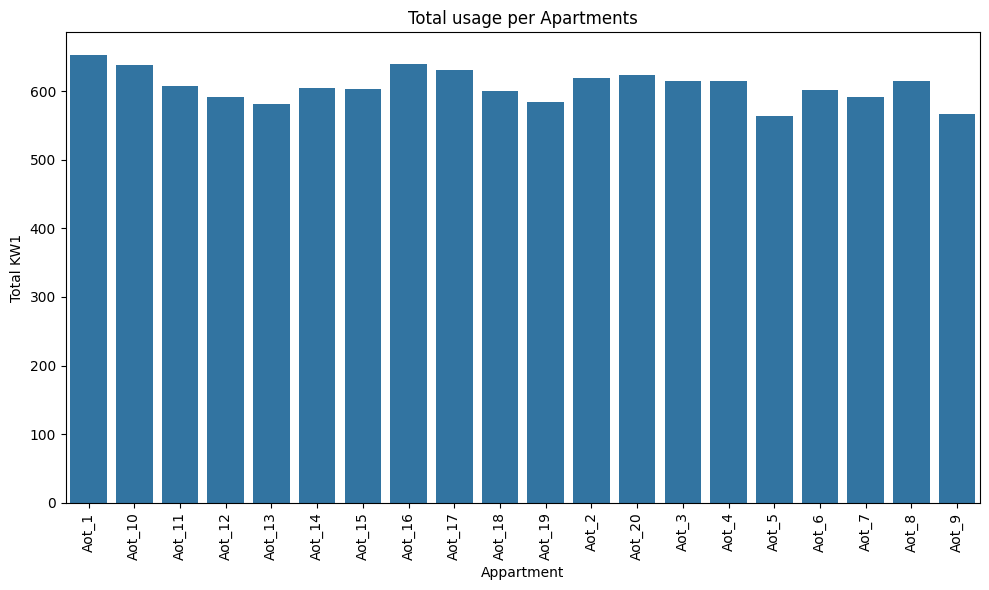

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=usage_per_apartment.index, y= usage_per_apartment.values)
plt.xticks(rotation=90)
plt.title("Total usage per Apartments")
plt.xlabel("Appartment")
plt.ylabel("Total KW1")
plt.tight_layout()
plt.show()


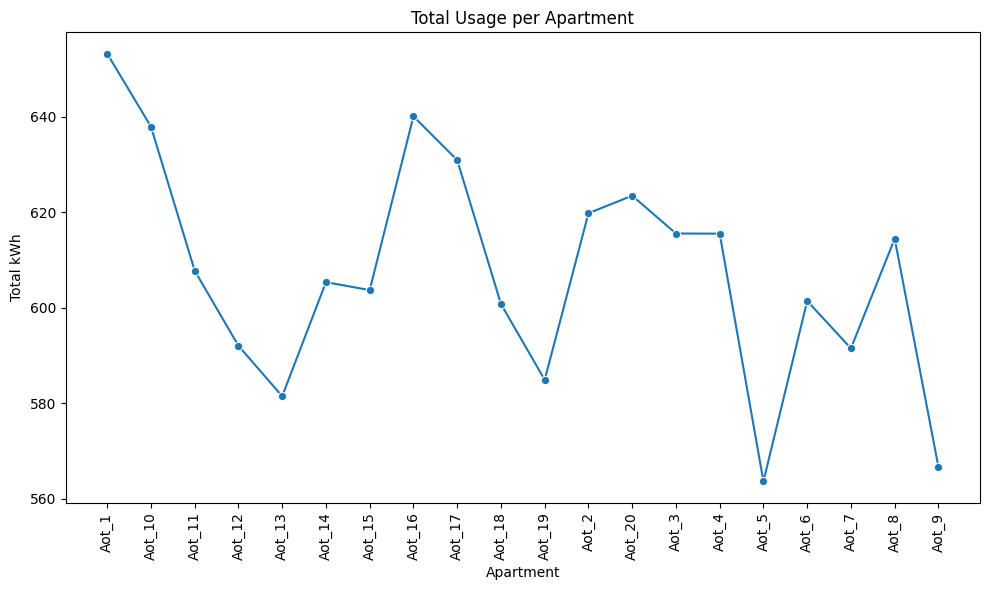

In [12]:
plt.figure(figsize=(10, 6))

# Correct usage of index and rotation
sns.lineplot(x=usage_per_apartment.index, y=usage_per_apartment.values, marker='o')
plt.xticks(rotation=90)
plt.title("Total Usage per Apartment")
plt.xlabel("Apartment")
plt.ylabel("Total kWh")
plt.tight_layout()
plt.show()

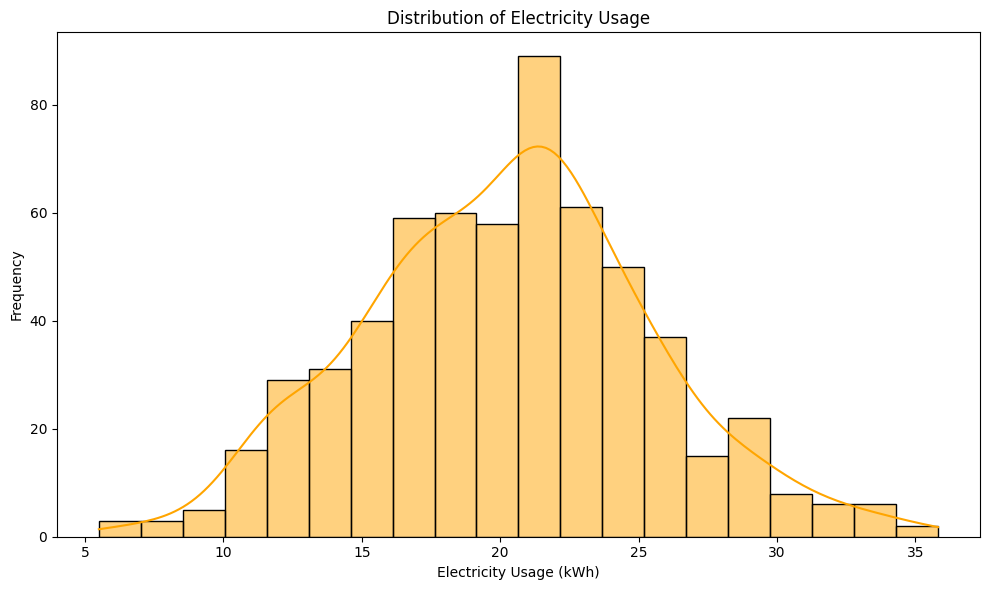

In [13]:
plt.figure(figsize=(10, 6))

# Histogram using seaborn
sns.histplot(df['Electricity_usage'], bins=20, kde=True, color='orange')
plt.title("Distribution of Electricity Usage")
plt.xlabel("Electricity Usage (kWh)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


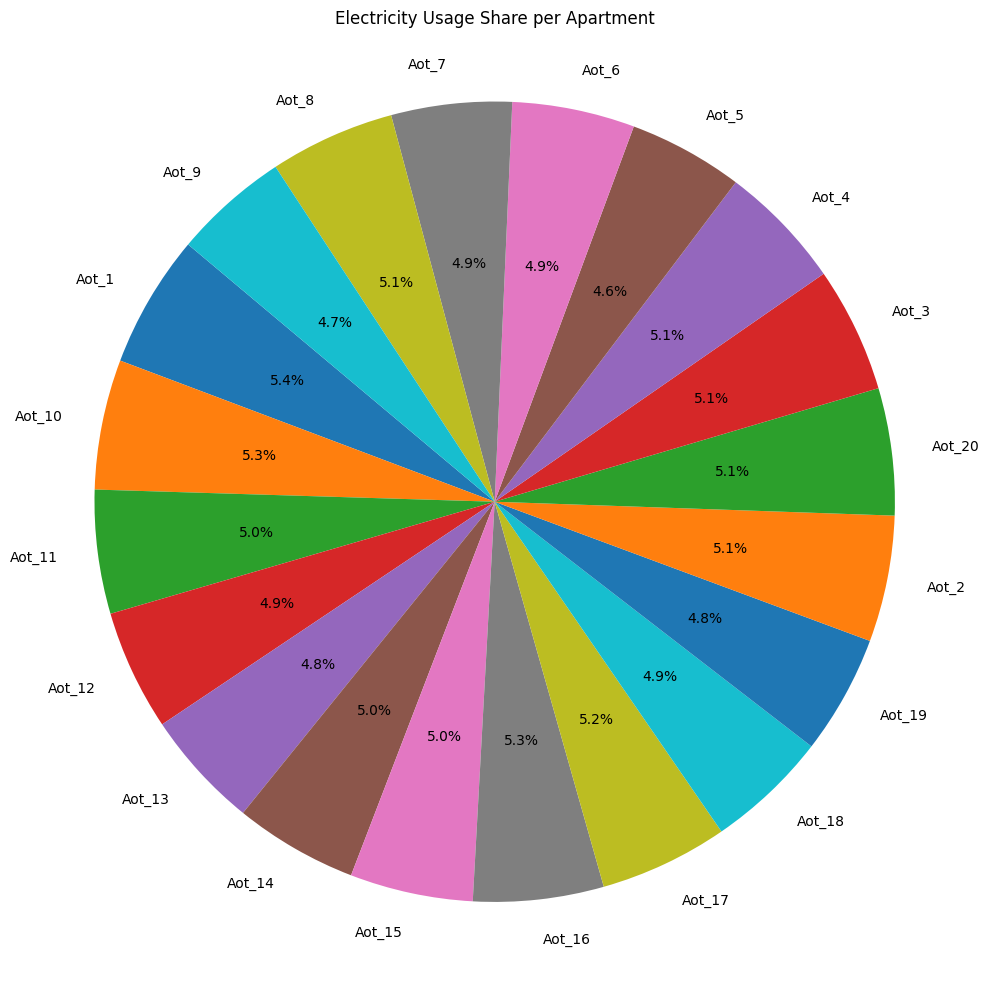

In [14]:
labels = usage_per_apartment.index
sizes = usage_per_apartment.values
# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Electricity Usage Share per Apartment")
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.tight_layout()
plt.show()


/tmp/ipython-input-1706410191.py:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


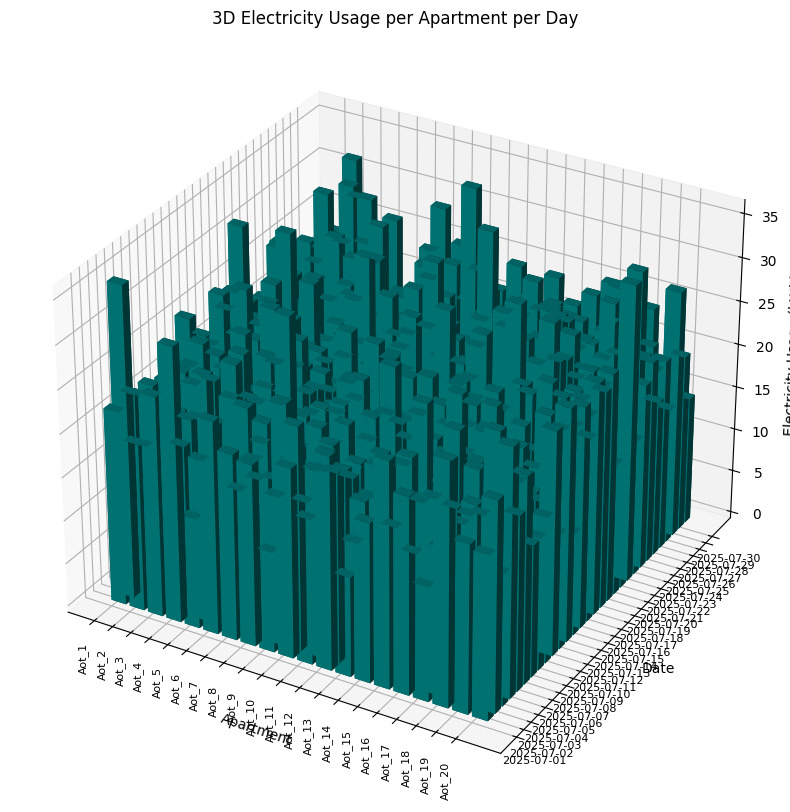

In [15]:
df['Date_str'] = df['Date'].dt.strftime('%Y-%m-%d')  # Convert dates to string for display
apartment_labels = df['Apartment'].unique()
date_labels = df['Date_str'].unique()

# Create index mappings for 3D plot
x_pos = df['Apartment'].apply(lambda x: np.where(apartment_labels == x)[0][0])
y_pos = df['Date_str'].apply(lambda x: np.where(date_labels == x)[0][0])
z_pos = np.zeros(len(df))

# Dimensions of bars
dx = dy = 0.8
dz = df['Electricity_usage'].values

# Create 3D plot
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D bars
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, shade=True, color='teal')

# Set labels
ax.set_xticks(np.arange(len(apartment_labels)))
ax.set_xticklabels(apartment_labels, rotation=90, fontsize=8)

ax.set_yticks(np.arange(len(date_labels)))
ax.set_yticklabels(date_labels, fontsize=8)

ax.set_xlabel('Apartment')
ax.set_ylabel('Date')
ax.set_zlabel('Electricity Usage (kWh)')
ax.set_title('3D Electricity Usage per Apartment per Day')

plt.tight_layout()
plt.show()

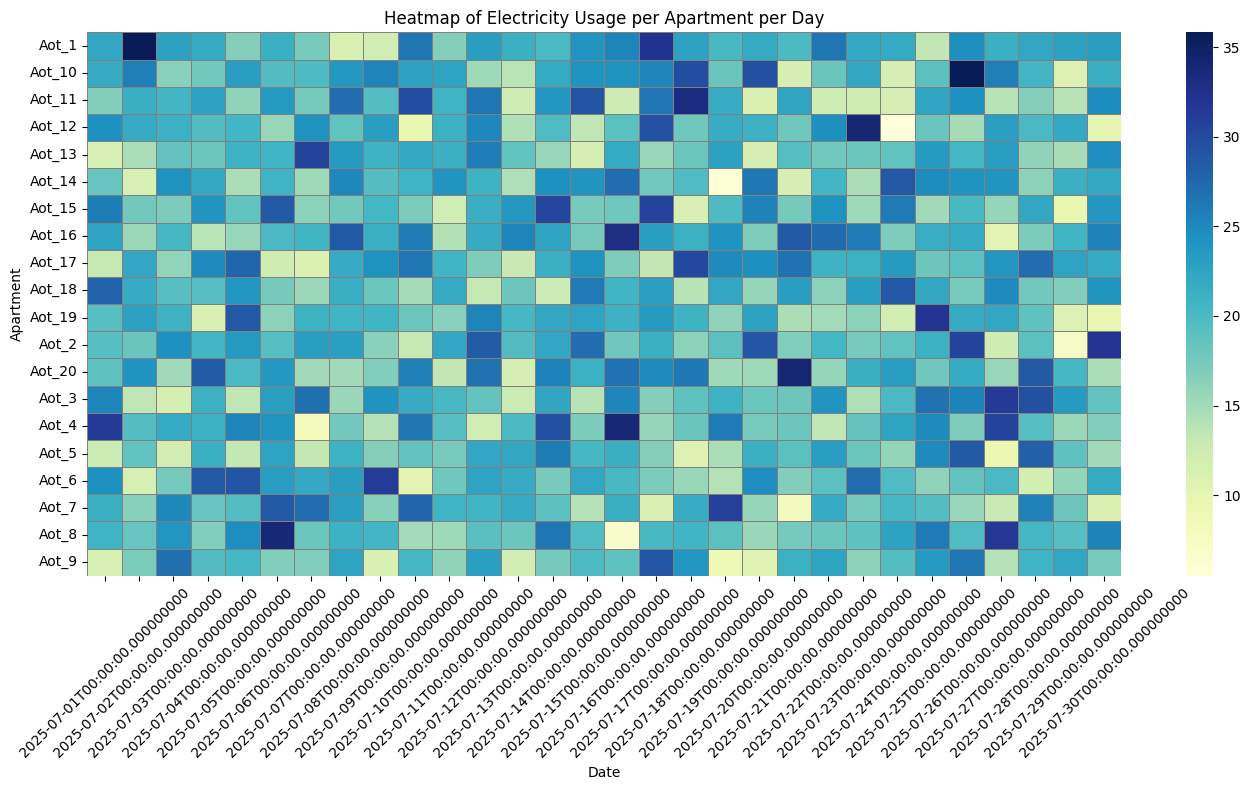

In [16]:
usage_matrix = df.pivot_table(index='Apartment', columns='Date', values='Electricity_usage')

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(usage_matrix, cmap="YlGnBu", linewidths=0.5, linecolor='gray')

# Formatting
plt.title("Heatmap of Electricity Usage per Apartment per Day")
plt.xlabel("Date")
plt.ylabel("Apartment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2588835082.py:29: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


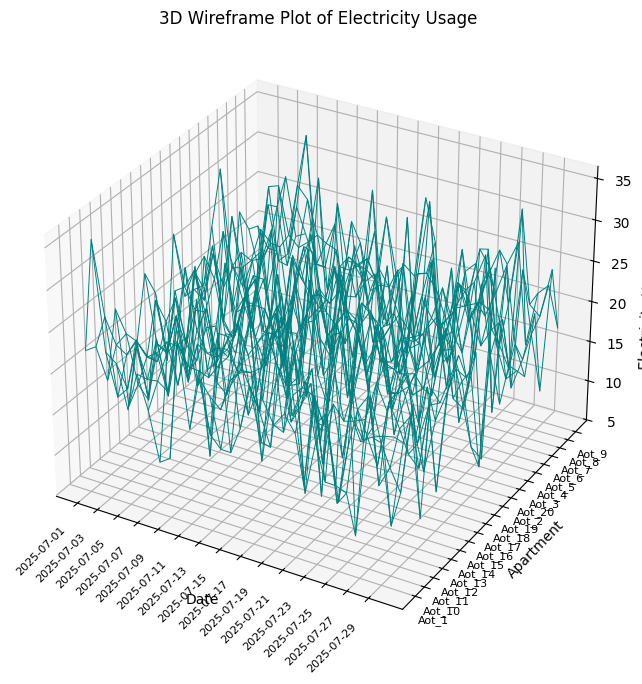

In [17]:
pivot_table = df.pivot_table(index='Apartment', columns='Date', values='Electricity_usage')

# Prepare axes
X_labels = pivot_table.columns.strftime('%Y-%m-%d')
Y_labels = pivot_table.index

X = np.arange(len(X_labels))
Y = np.arange(len(Y_labels))
X, Y = np.meshgrid(X, Y)
Z = pivot_table.values

# Plot the wireframe
fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, color='teal', linewidth=0.7)

# Customize ticks and labels
ax.set_xticks(np.arange(len(X_labels))[::2])
ax.set_xticklabels(X_labels[::2], rotation=45, ha='right', fontsize=8)
ax.set_yticks(np.arange(len(Y_labels)))
ax.set_yticklabels(Y_labels, fontsize=8)

ax.set_xlabel('Date')
ax.set_ylabel('Apartment')
ax.set_zlabel('Electricity Usage (kWh)')
ax.set_title('3D Wireframe Plot of Electricity Usage')

plt.tight_layout()
plt.show()

In [18]:
threshold = df["Electricity_usage"].mean() + 2 * df["Electricity_usage"].std()
df["High_usage_flag"] = df["Electricity_usage"] > threshold
print(df[df["High_usage_flag"] == True].head())


         Date Apartment  Electricity_usage    Date_str  High_usage_flag
1  2025-07-02     Aot_1              35.80  2025-07-02             True
16 2025-07-17     Aot_1              32.27  2025-07-17             True
55 2025-07-26     Aot_2              30.69  2025-07-26             True
59 2025-07-30     Aot_2              32.08  2025-07-30             True
86 2025-07-27     Aot_3              31.46  2025-07-27             True
